Please input a horse ID and the program will generate a line chartV371


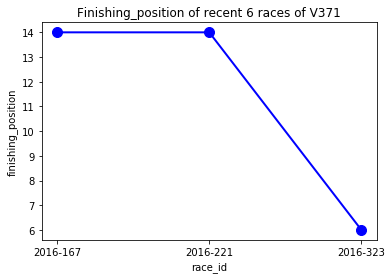

In [6]:
import os
import csv
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_data(name = ''):
    df = ""
    path = os.getcwd()
    direct='data'
    file=os.path.join(path,direct, name)
    #opencsv=""
    try:
        opencsv = open(os.path.join(path,direct,name), 'r')
        #print(opencsv)#find the race-result-horse file
    except:
        while opencsv != name:  # if the file cant be found if there is an error
            print("Could not open ", "file")
            opencsv = input("\nPlease try to open file again: ")
    else:
        with open(os.path.join(path,direct,name)) as f:
            feature_names = []#f.readline()
            #print(feature_names)
            reader = csv.reader(f)
            for row in reader:
                feature_names = row
                #print(feature_names)
                break
            df =  pd.read_csv(open(os.path.join(path,direct,name)), header=None, names = feature_names) #, na_values = ['WV-A' , 'WV'])
            df.drop(0, inplace = True)
    return df

def plot_line_chart(horse = ""):
    df = get_data('training.csv')
    #df_test = get_data('testing.csv')
    #df = df_train.append(df_test , ignore_index = True)
    #no_1 = df[df["ave_rank"] == "1"]
    #print(no_1)
    #print(df)
    #print(horse)
    horse_set = df[df["horse_id"] == horse].reset_index(drop=True)
    #print(horse_set)
    recent_race_pos = ""
    recent_race_id = ""
    
    if horse_set.empty :  #check whether the dataset has the input horse id
        print("No such horse!\n")
    else:
        if horse_set.shape[0] < 6:
            recent_race_pos = np.array(list(map(int,horse_set.loc[:,['finishing_position']].values.ravel())))
            
            recent_race_id =  horse_set.loc[:,['race_id']].values.ravel()
            
        elif horse_set.shape[0] >= 6:    
            recent_race_pos = np.array(
                list(map(int,horse_set.loc[horse_set.shape[0]-6 :horse_set.shape[0]-1,['finishing_position']].values.ravel())))
            recent_race_id =  horse_set.loc[horse_set.shape[0]-6 :horse_set.shape[0]-1,['race_id']].values.ravel()
    #print(recent_race_pos)
    #print(recent_race_id)
    
    plt.plot(recent_race_id, recent_race_pos, color='blue', marker='o' ,
        linewidth=2, markersize=10)
    plt.xlabel('race_id')
    plt.ylabel('finishing_position')
    plt.title("Finishing_position of recent 6 races of {0}".format(horse))
    plt.show()
    


if __name__ == '__main__':
    horse_name = input("Please input a horse ID and the program will generate a line chart").upper()
    #print(horse_name)
    plot_line_chart(horse_name)
   